<a href="https://colab.research.google.com/github/dgavieira/regularization/blob/main/1_no_overfitting_avoiding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

Epoch 1/100
11/11 [==============================] - 7s 69ms/step - loss: 0.6862 - accuracy: 0.3724 - val_loss: 0.6067 - val_accuracy: 0.3772
Epoch 2/100
11/11 [==============================] - 0s 21ms/step - loss: 0.5940 - accuracy: 0.3754 - val_loss: 0.5464 - val_accuracy: 0.3860
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 0.5468 - accuracy: 0.4311 - val_loss: 0.5130 - val_accuracy: 0.4737
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 0.5162 - accuracy: 0.6364 - val_loss: 0.4920 - val_accuracy: 0.7281
Epoch 5/100
11/11 [==============================] - 0s 11ms/step - loss: 0.4958 - accuracy: 0.8270 - val_loss: 0.4774 - val_accuracy: 0.8509
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.4813 - accuracy: 0.8739 - val_loss: 0.4658 - val_accuracy: 0.9123
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.4702 - accuracy: 0.8974 - val_loss: 0.4564 - val_accuracy: 0.9298
Epoch 8/

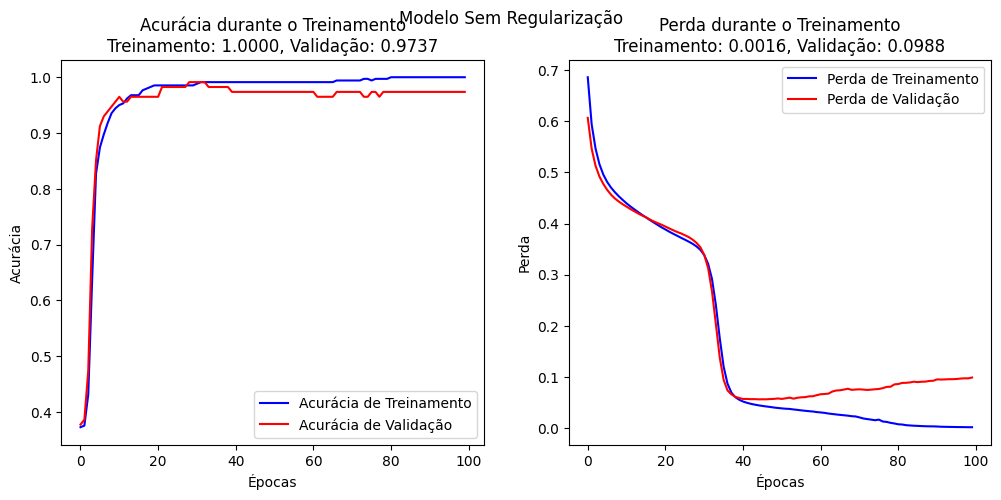

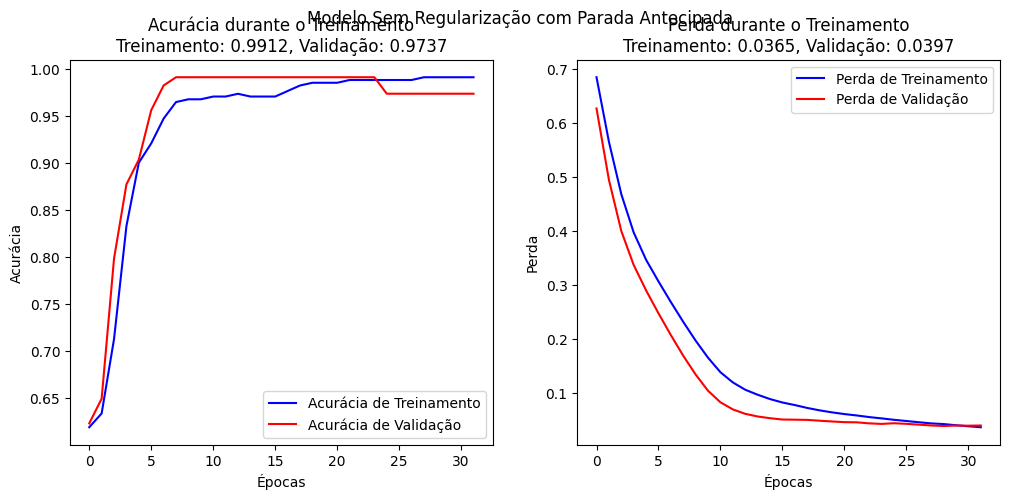

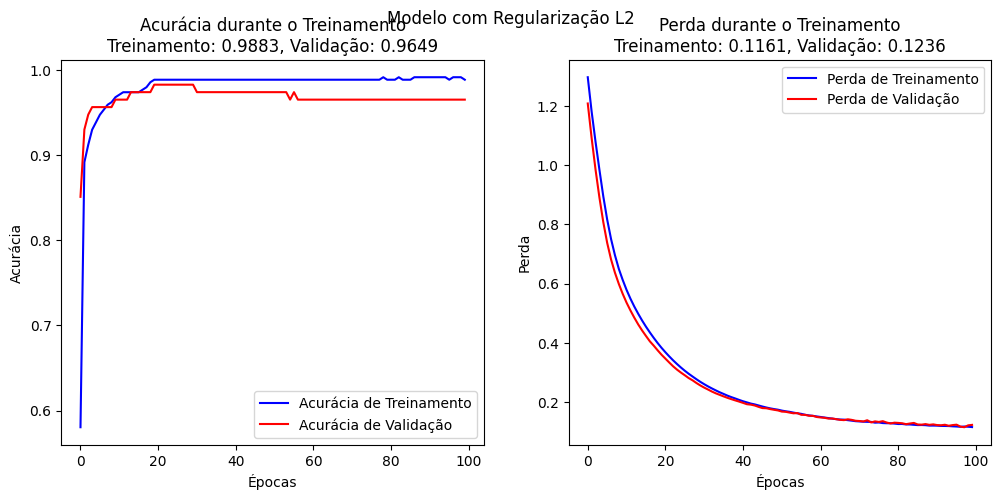

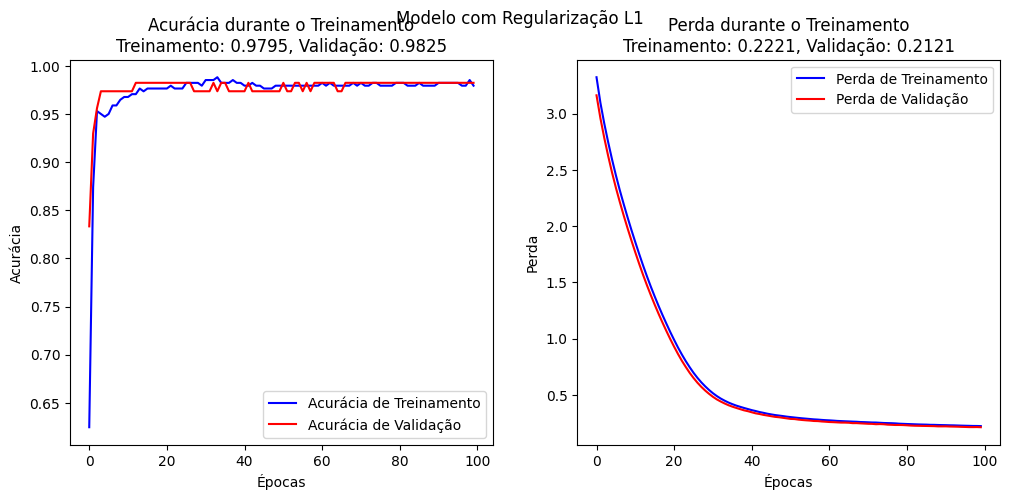

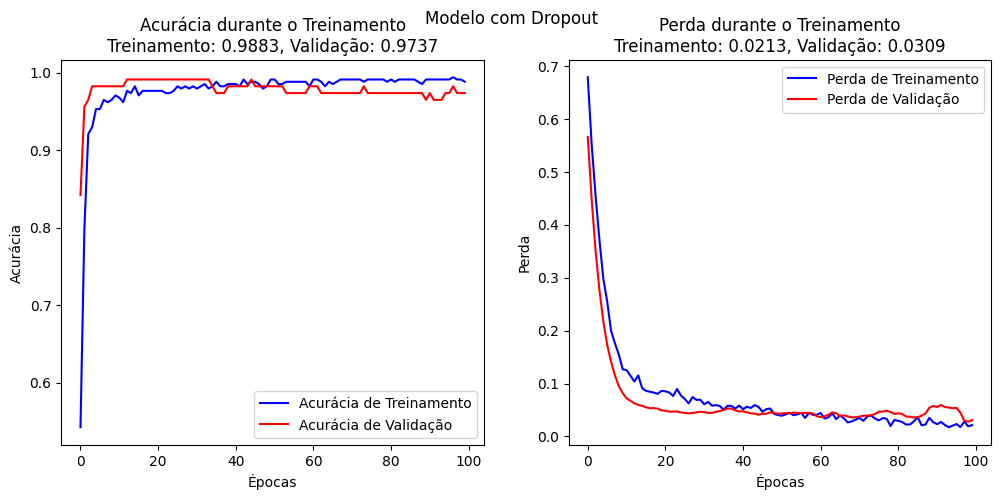

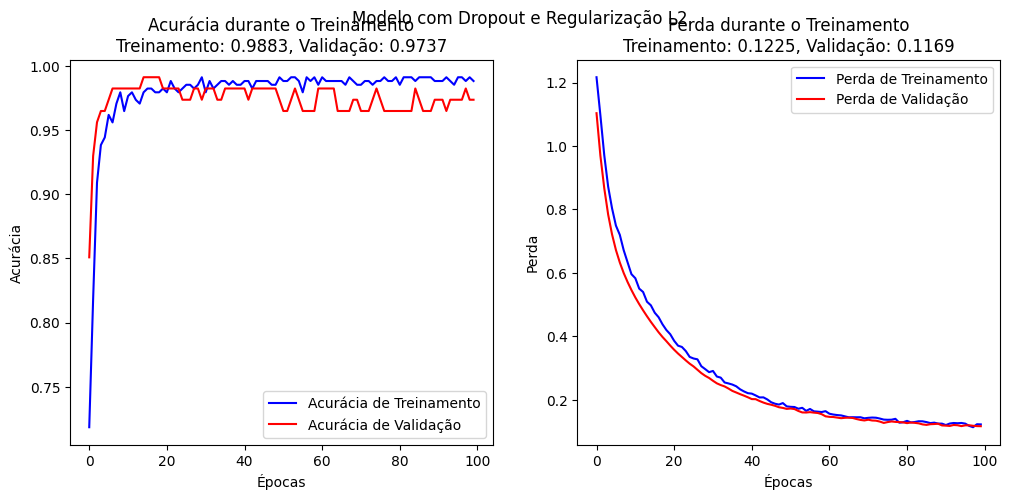

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt

# Carregar a base de dados do arquivo CSV
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

# Separar as características e o alvo
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

# Converter a coluna 'Diagnosis' para binário: M (maligno) = 1, B (benigno) = 0
y = y.map({'M': 1, 'B': 0})

# Dividir o conjunto de dados em treinamento (80%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

"""## 2. Função para definir os callbacks"""

def create_callbacks(filepath='/tmp/ckpt/checkpoint.model.keras'):
    # Callback para salvar o modelo com melhor acurácia no conjunto de validação
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
        filepath=filepath,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )

    # Callback para parada antecipada
    early_stopping_callback = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    return [model_checkpoint_callback, early_stopping_callback]

"""## 3. Definir o Modelo Sem Regularização"""

# Definir o modelo sem regularização
def create_model_no_regularization():
    model = Sequential([
        Dense(32, input_shape=(X_train.shape[1],), activation='relu'),  # Camada adicional
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

"""## 4. Definir o modelo sem regularização com parada antecipada"""

# Definir o modelo sem regularização com parada antecipada
def create_model_no_reg_early_stop():
    model = create_model_no_regularization()
    callbacks = create_callbacks()
    return model, callbacks

"""## 5. Definir o Modelo com Regularização L2"""

# Definir o modelo com regularização L2
def create_model_l2():
    model = Sequential([
        Dense(32, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.01)),  # Camada adicional
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

"""## 6. Definir o modelo com regularização L1"""

# Definir o modelo com regularização L1
def create_model_l1():
    model = Sequential([
        Dense(32, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l1(0.01)),  # Camada adicional
        Dense(16, activation='relu', kernel_regularizer=l1(0.01)),
        Dense(8, activation='relu', kernel_regularizer=l1(0.01)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

"""## 7. Definir o modelo com Dropout"""

# Definir o modelo com Dropout de 30% na segunda camada
def create_model_dropout():
    model = Sequential([
        Dense(32, input_shape=(X_train.shape[1],), activation='relu'),  # Camada adicional
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

"""## 8. Definir o modelo com Dropout e Regularização L2"""

# Definir o modelo com Dropout e Regularização L2
def create_model_dropout_l2():
    model = Sequential([
        Dense(32, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.01)),  # Camada adicional
        Dropout(0.3),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

"""## 9. Treinar e avaliar os modelos"""

# Função para treinar e avaliar o modelo
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, epochs, callbacks=None):
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    # Avaliar o desempenho no conjunto de teste
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"Loss no teste: {test_loss:.4f}, Acurácia no teste: {test_accuracy:.4f}")

    return history, test_accuracy

# Dicionário para armazenar as acurácias dos modelos
model_accuracies = {}

# Treinar e avaliar os modelos
model_no_reg = create_model_no_regularization()
history_no_reg, acc_no_reg = train_and_evaluate_model(model_no_reg, X_train, y_train, X_val, y_val, X_test, y_test, epochs=100)
model_accuracies['Modelo Sem Regularização'] = acc_no_reg

model_no_reg_early_stop, callbacks_no_reg_early_stop = create_model_no_reg_early_stop()
history_no_reg_early_stop, acc_no_reg_early_stop = train_and_evaluate_model(model_no_reg_early_stop, X_train, y_train, X_val, y_val, X_test, y_test, epochs=100, callbacks=callbacks_no_reg_early_stop)
model_accuracies['Modelo Sem Regularização com Parada Antecipada'] = acc_no_reg_early_stop

model_l2 = create_model_l2()
history_l2, acc_l2 = train_and_evaluate_model(model_l2, X_train, y_train, X_val, y_val, X_test, y_test, epochs=100)
model_accuracies['Modelo com Regularização L2'] = acc_l2

model_l1 = create_model_l1()
history_l1, acc_l1 = train_and_evaluate_model(model_l1, X_train, y_train, X_val, y_val, X_test, y_test, epochs=100)
model_accuracies['Modelo com Regularização L1'] = acc_l1

model_dropout = create_model_dropout()
history_dropout, acc_dropout = train_and_evaluate_model(model_dropout, X_train, y_train, X_val, y_val, X_test, y_test, epochs=100)
model_accuracies['Modelo com Dropout'] = acc_dropout

model_dropout_l2 = create_model_dropout_l2()
history_dropout_l2, acc_dropout_l2 = train_and_evaluate_model(model_dropout_l2, X_train, y_train, X_val, y_val, X_test, y_test, epochs=100)
model_accuracies['Modelo com Dropout e Regularização L2'] = acc_dropout_l2

"""## Escolha do melhor modelo"""

# Encontrar o nome do modelo com a melhor acurácia no teste
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print(f"O melhor modelo é: {best_model_name} com acurácia no teste de {best_accuracy:.4f}")

# Carregar o melhor modelo salvo durante o treinamento (se aplicável)
best_model = keras.models.load_model('/tmp/ckpt/checkpoint.model.keras')

# Avaliar o desempenho do melhor modelo no conjunto de teste
best_test_loss, best_test_accuracy = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Loss no teste do melhor modelo: {best_test_loss:.4f}, Acurácia no teste do melhor modelo: {best_test_accuracy:.4f}")

"""## Plotar Histórico de Treinamento"""

# Função para plotar o histórico de treinamento
def plot_history(history, title):
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'b', label='Acurácia de Treinamento')
    plt.plot(history.history['val_accuracy'], 'r', label='Acurácia de Validação')
    plt.title(f'Acurácia durante o Treinamento\nTreinamento: {final_train_accuracy:.4f}, Validação: {final_val_accuracy:.4f}')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'b', label='Perda de Treinamento')
    plt.plot(history.history['val_loss'], 'r', label='Perda de Validação')
    plt.title(f'Perda durante o Treinamento\nTreinamento: {final_train_loss:.4f}, Validação: {final_val_loss:.4f}')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()

    plt.suptitle(title)
    plt.show()

# Plotar os históricos de treinamento para cada modelo
plot_history(history_no_reg, "Modelo Sem Regularização")
plot_history(history_no_reg_early_stop, "Modelo Sem Regularização com Parada Antecipada")
plot_history(history_l2, "Modelo com Regularização L2")
plot_history(history_l1, "Modelo com Regularização L1")
plot_history(history_dropout, "Modelo com Dropout")
plot_history(history_dropout_l2, "Modelo com Dropout e Regularização L2")
